# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Data Schema

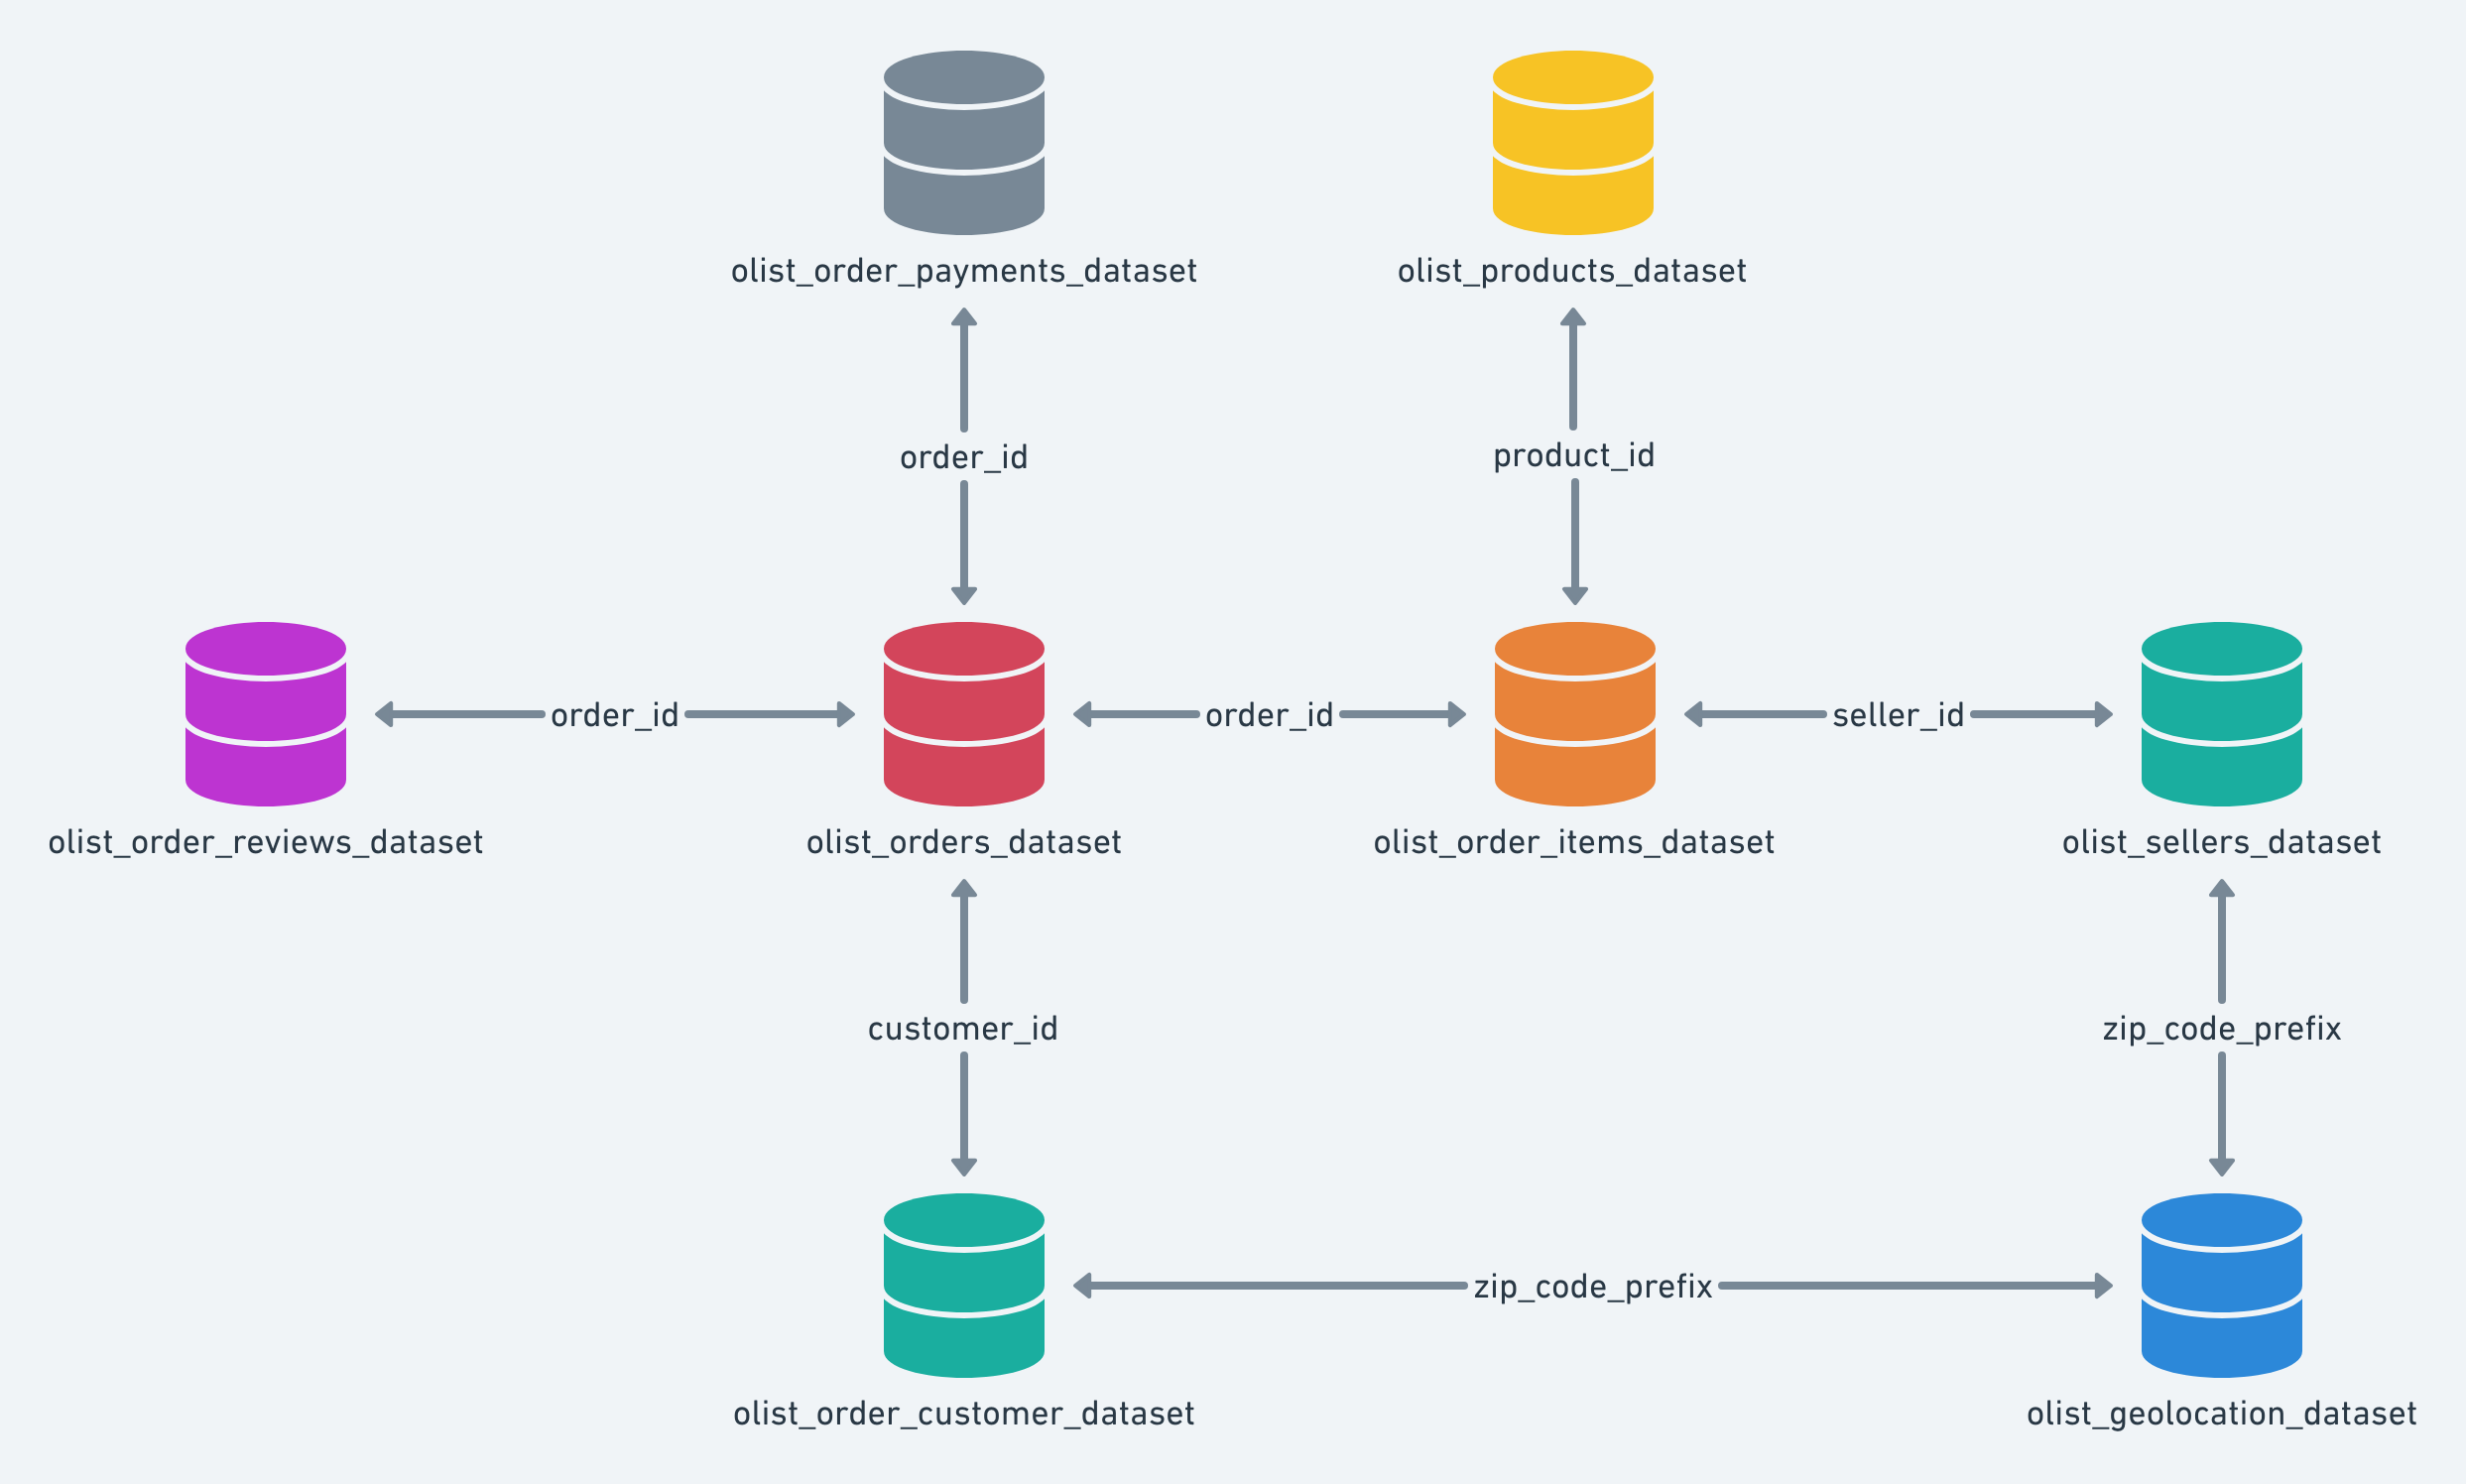

# Gathering Data


In [2]:
# Path ke folder data
data_path = "data"

# Membaca file ke dalam DataFrames
df_items = pd.read_csv(os.path.join(data_path, "olist_order_items_dataset.csv"))
df_reviews = pd.read_csv(os.path.join(data_path, "olist_order_reviews_dataset.csv"))
df_orders = pd.read_csv(os.path.join(data_path, "olist_orders_dataset.csv"))
df_products = pd.read_csv(os.path.join(data_path, "olist_products_dataset.csv"))
df_geolocation = pd.read_csv(os.path.join(data_path, "olist_geolocation_dataset.csv"))
df_sellers = pd.read_csv(os.path.join(data_path, "olist_sellers_dataset.csv"))
df_payments = pd.read_csv(os.path.join(data_path, "olist_order_payments_dataset.csv"))
df_customers = pd.read_csv(os.path.join(data_path, "olist_customers_dataset.csv"))
df_category = pd.read_csv(os.path.join(data_path, "product_category_name_translation.csv"))

In [3]:
# Merging Dataframes
df = df_orders.merge(df_items, on='order_id', how='inner')
df = df.merge(df_payments, on='order_id', how='inner', validate='m:m')
df = df.merge(df_reviews, on='order_id', how='inner')
df = df.merge(df_products, on='product_id', how='inner')
df = df.merge(df_customers, on='customer_id', how='inner')
df = df.merge(df_sellers, on='seller_id', how='inner')

# Assessing Data

In [4]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,9350,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,9350,maua,SP


# Pertanyaan Bisnis

1. Berapa rata-rata waktu pengiriman dari pesanan dibuat hingga diterima pelanggan, dan bagaimana variasinya di setiap kategori produk dalam 1 tahun terakhir?

2. Produk atau kategori apa yang memberikan kontribusi pendapatan terbesar?

# Eksplorasi Data

In [5]:
df.shape

(117329, 39)

In [6]:
#Periksa tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117329 entries, 0 to 117328
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117329 non-null  object 
 1   customer_id                    117329 non-null  object 
 2   order_status                   117329 non-null  object 
 3   order_purchase_timestamp       117329 non-null  object 
 4   order_approved_at              117314 non-null  object 
 5   order_delivered_carrier_date   116094 non-null  object 
 6   order_delivered_customer_date  114858 non-null  object 
 7   order_estimated_delivery_date  117329 non-null  object 
 8   order_item_id                  117329 non-null  int64  
 9   product_id                     117329 non-null  object 
 10  seller_id                      117329 non-null  object 
 11  shipping_limit_date            117329 non-null  object 
 12  price                         

Terdapat format data yang masih `object`, seharusnya `datetime` :
   - `order_purchase_timestamp`
   - `order_approved_at`
   - `order_delivered_carrier_date`
   - `order_delivered_customer_date`
   - `order_estimated_delivery_date`
   - `shipping_limit_date`
   - `review_creation_date`
   - `review_answer_timestamp`


In [7]:
# Ubah Format Data
date_columns = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date',
    'shipping_limit_date',
    'review_creation_date',
    'review_answer_timestamp'
]

for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col])

In [8]:
#Periksa null value
df.isna().sum()


order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    15
order_delivered_carrier_date       1235
order_delivered_customer_date      2471
order_estimated_delivery_date         0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
review_id                             0
review_score                          0
review_comment_title             103437
review_comment_message            67650
review_creation_date                  0
review_answer_timestamp               0
product_category_name              1695


Analisis Missing Values

1. **Kolom dengan Missing Values Signifikan**:
   - `review_comment_title`: 103,437 nilai kosong.
   - `review_comment_message`: 67,650 nilai kosong.
   - `order_delivered_customer_date`: 2,471 nilai kosong.
   - `order_delivered_carrier_date`: 1,235 nilai kosong.
   - `product_category_name`: 1,695 nilai kosong.
   - `product_name_lenght`: 1,695 nilai kosong.
   - `product_description_lenght`: 1,695 nilai kosong.
   - `product_photos_qty`: 1,695 nilai kosong.

2. **Kolom dengan Missing Values Minor**:
   - `order_approved_at`: 15 nilai kosong.
   - `product_weight_g`, `product_length_cm`, `product_height_cm`, `product_width_cm`: 20 nilai kosong.


In [9]:
#Analisis deskriptif
df.describe()


,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,shipping_limit_date,price,freight_value,payment_sequential,...,review_answer_timestamp,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,seller_zip_code_prefix
count,117329,117314,116094,114858,117329,117329.000000,117329,117329.000000,117329.000000,117329.000000,...,117329,115634.000000,115634.000000,115634.000000,117309.000000,117309.000000,117309.000000,117309.000000,117329.000000,117329.000000
mean,2017-12-30 10:29:39.749081856,2017-12-30 21:58:19.189721344,2018-01-03 12:09:47.466820096,2018-01-12 23:40:18.665604608,2018-01-23 07:08:36.977047296,1.194121,2018-01-06 02:01:32.273274624,120.524349,20.027514,1.094452,...,2018-01-15 03:28:45.726341888,48.768018,785.802861,2.205528,2110.763062,30.254456,16.612476,23.071452,35060.118112,24450.781955
min,2016-09-04 21:15:19,2016-10-04 09:43:32,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-20 00:00:00,1.000000,2016-09-19 00:15:34,0.850000,0.000000,1.000000,...,2016-10-16 03:20:17,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1003.000000,1001.000000
25%,2017-09-11 16:37:08,2017-09-12 04:35:32.500000,2017-09-14 20:27:55.249999872,2017-09-23 00:28:20.500000,2017-10-03 00:00:00,1.000000,2017-09-18 15:55:47,39.900000,13.080000,1.000000,...,2017-09-25 23:24:55,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,11250.000000,6429.000000
50%,2018-01-18 09:42:57,2018-01-18 14:16:46,2018-01-23 18:50:08,2018-02-01 16:15:39.500000,2018-02-14 00:00:00,1.000000,2018-01-25 09:09:32,74.900000,16.280000,1.000000,...,2018-02-03 23:11:32,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,24240.000000,13660.000000
75%,2018-05-03 19:53:54,2018-05-04 04:11:43.500000,2018-05-07 15:25:00,2018-05-15 14:03:23.500000,2018-05-25 00:00:00,1.000000,2018-05-10 03:31:06,134.900000,21.180000,1.000000,...,2018-05-17 16:20:40,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,58770.000000,28035.000000
max,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,21.000000,2020-04-09 22:35:08,6735.000000,409.680000,29.000000,...,2018-10-29 12:27:35,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99990.000000,99730.000000
std,NaN,NaN,NaN,NaN,NaN,0.684225,NaN,182.944843,15.828077,0.731174,...,NaN,10.033831,652.382965,1.717783,3785.128931,16.177519,13.452625,11.745875,29849.496175,27582.364358


Outliers:
Harga (price), berat produk (product_weight_g), nilai pembayaran (payment_value), dan ongkir (freight_value) memiliki outliers yang signifikan dan perlu dievaluasi lebih lanjut.

Data Anomali:
Nilai nol pada kolom seperti freight_value dan payment_value perlu ditelusuri apakah valid atau merupakan kesalahan data.

Review:
Sebagian besar ulasan menunjukkan pelanggan puas, tetapi ulasan dengan skor rendah (1 atau 2) perlu dianalisis untuk meningkatkan pengalaman pelanggan.

Dimensi Produk:
Nilai ekstrem pada dimensi produk dapat mencerminkan produk unik atau data yang perlu diperbaiki.

In [10]:
#Cek duplikasi
df.duplicated().sum()


0

Tidak ada data duplikat

In [11]:
# Validasi Nilai Logis
# Jumlah baris dengan tanggal pengiriman tidak logis
invalid_dates = df[df['order_delivered_customer_date'] < df['order_purchase_timestamp']]
print(f"\nJumlah baris dengan tanggal pengiriman tidak logis: {len(invalid_dates)}")

# Jumlah baris dengan freight_value lebih besar dari price
invalid_freight = df[df['freight_value'] > df['price']]
print(f"\nJumlah baris dengan freight_value lebih besar dari price: {len(invalid_freight)}")


Jumlah baris dengan tanggal pengiriman tidak logis: 0

Jumlah baris dengan freight_value lebih besar dari price: 4352


Kemungkinan Penyebab:

Kesalahan data (data entry error).
Freight value dihitung untuk total berat barang, yang mungkin lebih tinggi daripada harga produk dalam kasus barang murah.

In [12]:
invalid_freight.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
45,5f49f31e537f8f1a496454b48edbe34d,a7260a6ccba78544ccfaf43f920b7240,delivered,2017-08-24 11:31:28,2017-08-24 11:45:25,2017-08-25 14:17:55,2017-08-28 20:12:20,2017-09-14,2,be03d93320192443b8fa24c0ca6ead98,...,16.0,16.0,13.0,7a1de9bde89aedca8c5fbad489c5571c,1315,sao paulo,SP,9350,maua,SP
125,a59244db9c00a55a76803349b21f244d,b82f3c3423d8ffd289353c912be332f0,delivered,2018-07-24 02:10:35,2018-07-25 02:35:15,2018-07-25 14:49:00,2018-07-30 17:50:44,2018-08-08,1,6e423c2d28bfb207e1fd1d6e1df84721,...,20.0,10.0,18.0,3e332338454c5752a0ff8cb3858fabfb,13484,limeira,SP,31570,belo horizonte,SP
141,6e8e751584b3e3141e3e3c39f71408c2,85442da9cbd169529443a1d088a56346,delivered,2018-06-27 11:23:15,2018-06-27 11:35:17,2018-06-28 14:54:00,2018-07-11 23:34:40,2018-07-24,2,6e423c2d28bfb207e1fd1d6e1df84721,...,20.0,10.0,18.0,397017a63f9c38e08a205d660a5d3019,78010,cuiaba,MT,31570,belo horizonte,SP
409,b25e83776a0bf6440214b6258416e4e1,0e9a1a195d9e737e602ffc9cfe19053a,delivered,2018-07-26 17:26:17,2018-07-27 09:10:15,2018-07-30 09:15:00,2018-08-06 20:44:41,2018-08-15,1,0f461354af6a2189ef983f8e7a3390b5,...,19.0,11.0,13.0,1a195982d360650b48c729ef241d8150,35519,nova serrana,MG,13482,limeira,SP
1972,27a54410628f54cb15b276a47a14c7d7,e0760d6de182bf294c6a3896fab8d14e,delivered,2018-01-19 17:33:17,2018-01-19 17:50:19,2018-01-22 22:18:35,2018-02-02 20:12:33,2018-02-20,1,3b88c6a09d4f61f0566c39ed139fb5e2,...,20.0,20.0,20.0,6fd6f55fd011cbfd8f5de03f2a9c28dd,64390,demerval lobao,PI,31842,belo horizonte,MG


**Analisis Freight Value Lebih Besar dari Price**

Kemungkinan penyebab:
Barang yang sangat murah tapi berat, sehingga biaya pengiriman lebih tinggi daripada harga barang.
Kesalahan data pada kolom freight_value atau price.
Contoh pada baris:
Order ID: 5f49f31e537f8f1a496454b48edbe34d memiliki freight_value lebih besar dari price.
Distribusi Lokasi

Baris dengan pengiriman dari kota ke kota lain (misalnya, Sao Paulo → Maua atau Limeira → Belo Horizonte) mungkin menunjukkan biaya pengiriman yang tinggi untuk barang yang murah.

Menurut saya, banyak kasus dengan freight_value lebih besar dari price yang mungkin wajar, terutama untuk barang murah yang berat. Jadi ini tidak menjadi masalah.

# Cleaning data

In [13]:
# Penanganan Kolom Waktu
df = df[~df['order_approved_at'].isna()].copy()  # Hapus baris dengan nilai null pada order_approved_at
df.loc[df['order_delivered_customer_date'].isna(), 'order_delivered_customer_date'] = df['order_estimated_delivery_date']

# Penanganan Kolom Ulasan
df.loc[df['review_comment_message'].isna(), 'review_comment_message'] = 'No Comment'
df.loc[df['review_comment_title'].isna(), 'review_comment_title'] = 'No Title'

# Penanganan Kolom Produk
df.loc[df['product_category_name'].isna(), 'product_category_name'] = 'Unknown'
df.loc[df['product_name_lenght'].isna(), 'product_name_lenght'] = df['product_name_lenght'].mean()
df.loc[df['product_description_lenght'].isna(), 'product_description_lenght'] = df['product_description_lenght'].mean()
df.loc[df['product_photos_qty'].isna(), 'product_photos_qty'] = df['product_photos_qty'].mean()

# Penanganan Kolom Dimensi Produk
df.loc[df['product_weight_g'].isna(), 'product_weight_g'] = df['product_weight_g'].median()
df.loc[df['product_length_cm'].isna(), 'product_length_cm'] = df['product_length_cm'].median()
df.loc[df['product_height_cm'].isna(), 'product_height_cm'] = df['product_height_cm'].median()
df.loc[df['product_width_cm'].isna(), 'product_width_cm'] = df['product_width_cm'].median()


# Penanganan order_delivered_carrier_date, replace dengan order_approved_at
if 'order_delivered_carrier_date' in df.columns:
    df['order_delivered_carrier_date'].fillna(df['order_approved_at'], inplace=True)


### Penanganan Missing Values 

1. **Kolom Waktu**
   - `order_approved_at`: Hapus baris, karena pesanan gagal.
   - `order_delivered_customer_date`: Isi dengan `order_estimated_delivery_date`.

2. **Kolom Ulasan**
   - Isi `review_comment_message` dengan `No Comment` dan `review_comment_title` dengan `No Title`.

3. **Kolom Produk**
   - `product_category_name`: Isi dengan `Unknown`.
   - Kolom numerik: Isi dengan rata-rata.

4. **Kolom Dimensi Produk**
   - Isi dengan median untuk mengurangi dampak outliers.

5. **Kolom `order_delivered_carrier_date`**
   - Dianggap logis bahwa kurir mengambil barang segera setelah pesanan disetujui.

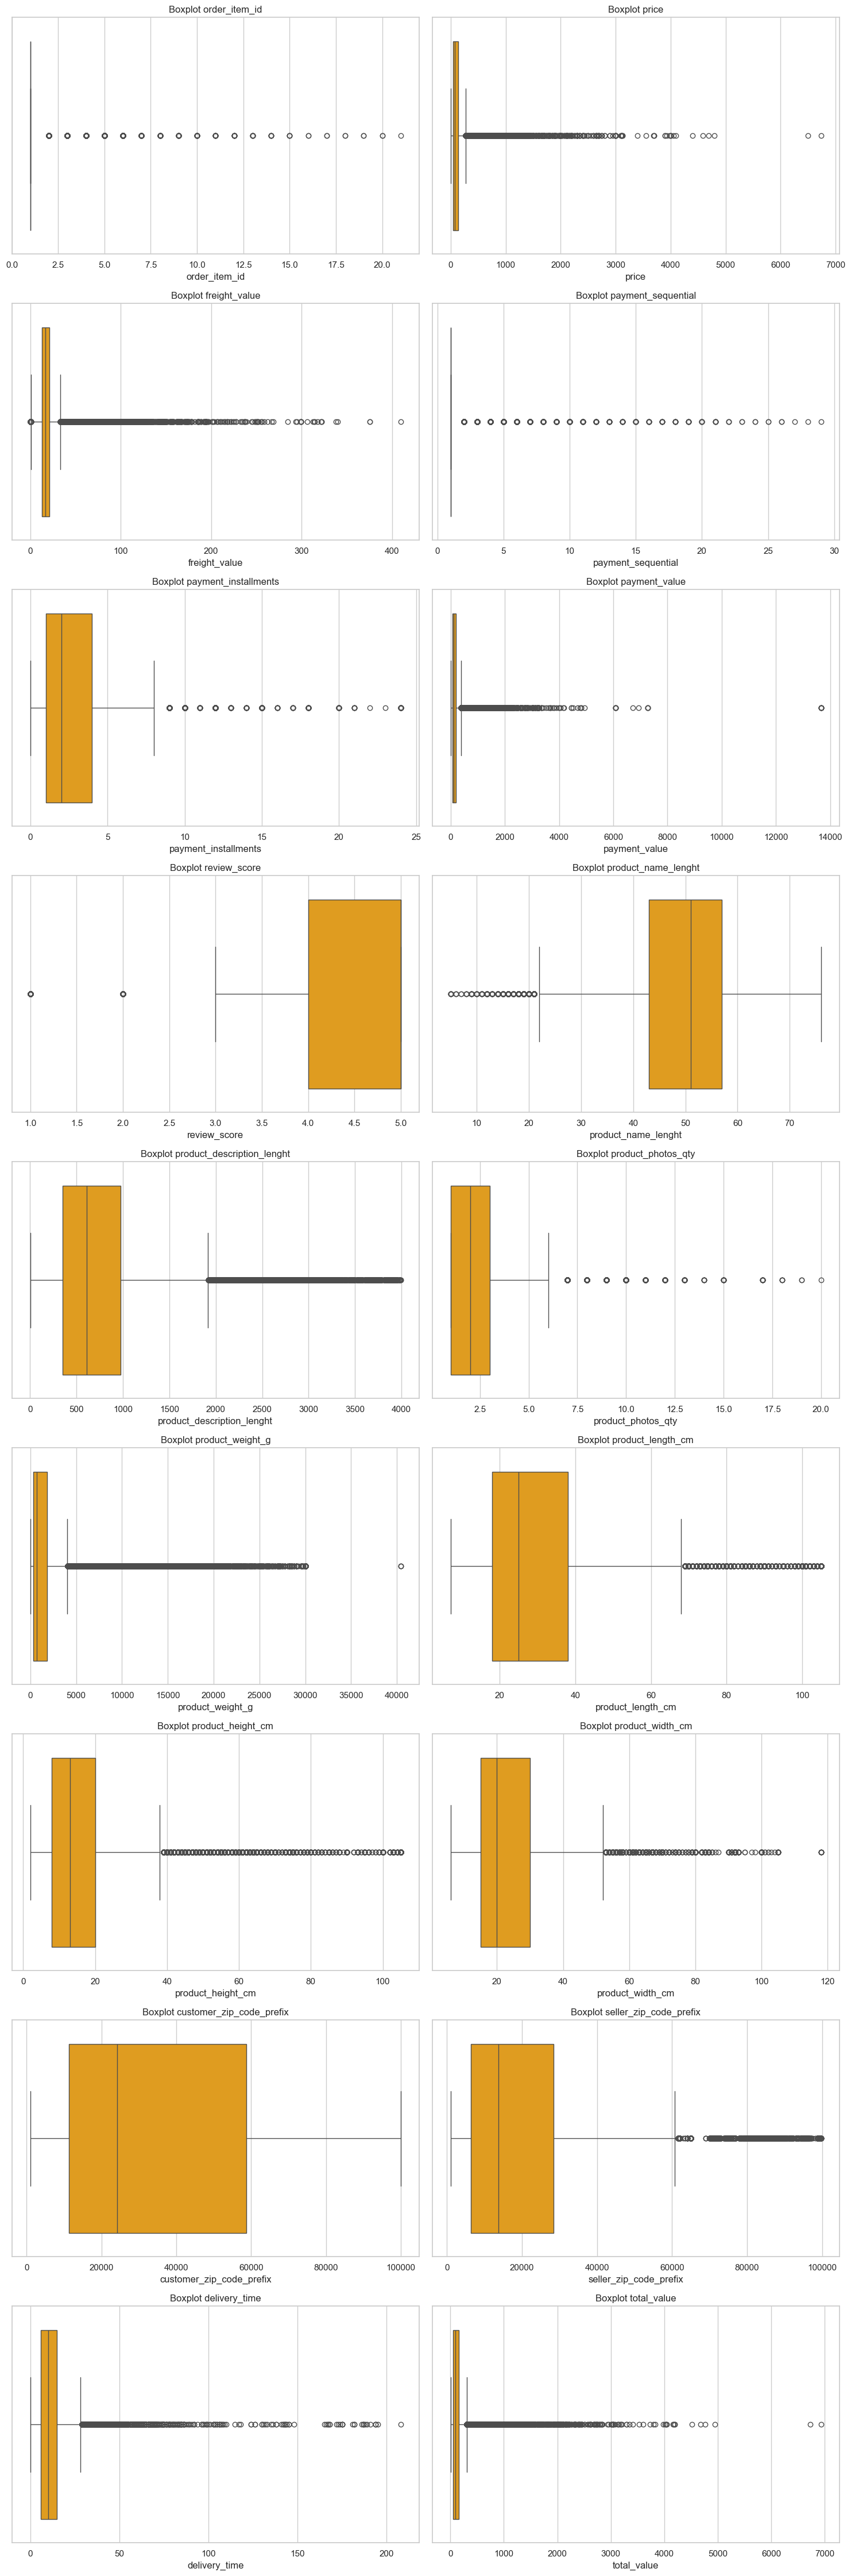

In [ ]:
# Memeriksa Outlier dengan Boxplot
# Kolom numerik
kolom_numerik = df.select_dtypes(include=['float64', 'int64']).columns
jumlah_kolom = len(kolom_numerik)
kolom_per_baris = 2  # Menentukan jumlah kolom per baris untuk plot
jumlah_baris = (jumlah_kolom + kolom_per_baris - 1) // kolom_per_baris  # Menghitung jumlah baris plot

# Membuat subplots
fig, axes = plt.subplots(nrows=jumlah_baris, ncols=kolom_per_baris, figsize=(15, jumlah_baris * 5))
axes = axes.flatten()  # Meratakan array axes untuk iterasi

# Membuat boxplot untuk setiap kolom
for i, col in enumerate(kolom_numerik):
    sns.boxplot(data=df, x=col, ax=axes[i], color='orange')  # Menambahkan parameter warna oranye
    axes[i].set_title(f'Boxplot {col}')

# Menyembunyikan subplot kosong jika jumlah kolom tidak genap
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Menyesuaikan tata letak
plt.tight_layout()
plt.show()

Meskipun terlihat seperti outlier, tetapi pada kasus e-commerce ini semuanya dianggap logis dan tidak ditangani.

# EDA & Visualization

In [72]:
sns.set_theme(style="whitegrid", palette="Oranges")


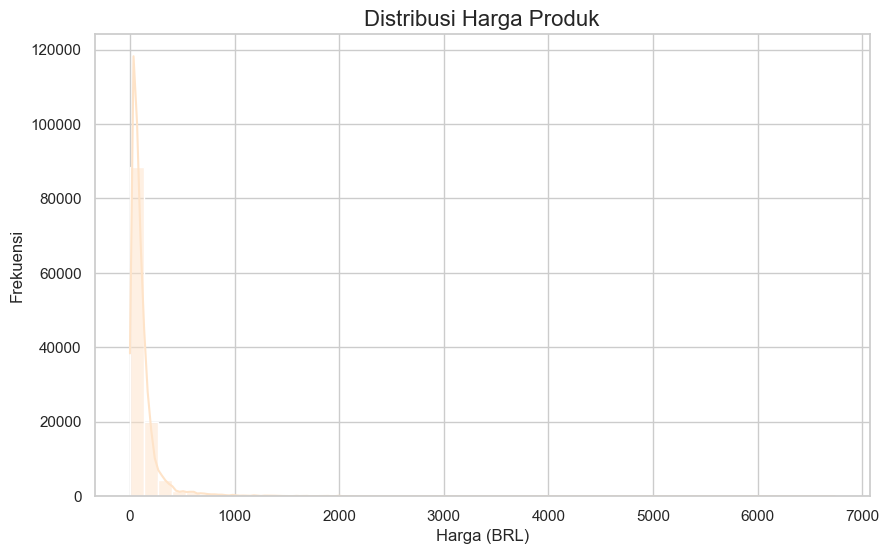

In [73]:
# 1. Distribusi Harga Produk
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribusi Harga Produk', fontsize=16)
plt.xlabel('Harga (BRL)')
plt.ylabel('Frekuensi')
plt.show()

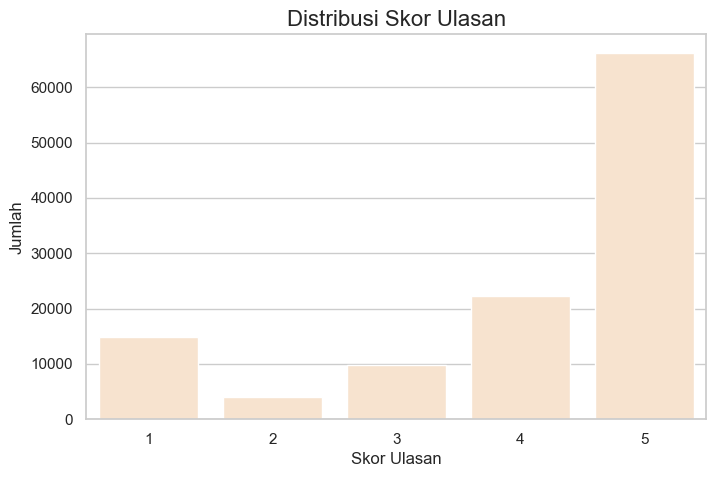

In [74]:
# 2. Skor Ulasan
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='review_score')
plt.title('Distribusi Skor Ulasan', fontsize=16)
plt.xlabel('Skor Ulasan')
plt.ylabel('Jumlah')
plt.show()

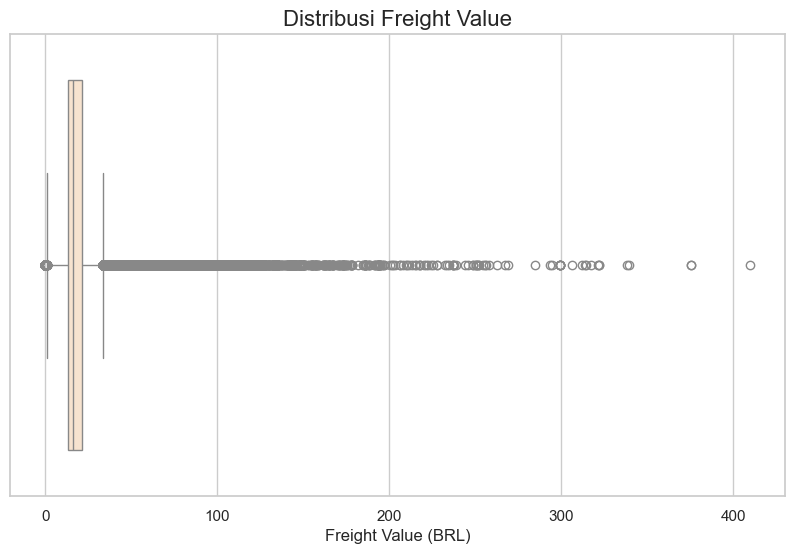

In [75]:
# 3. Distribusi Freight Value
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='freight_value')
plt.title('Distribusi Freight Value', fontsize=16)
plt.xlabel('Freight Value (BRL)')
plt.show()

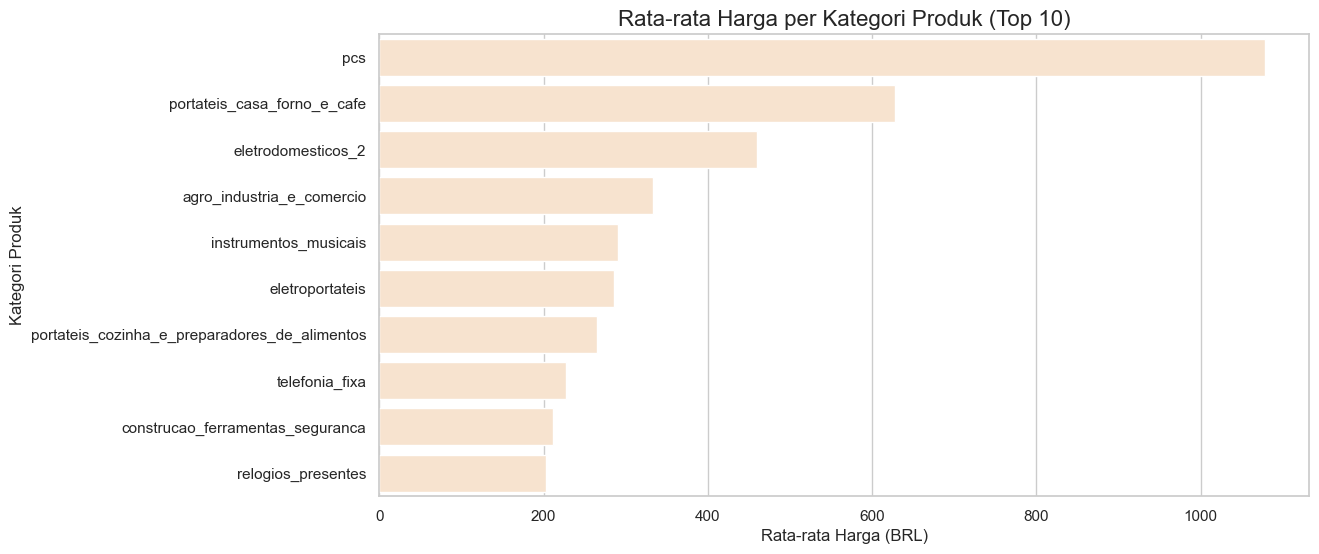

In [76]:
# 4. Rata-rata Harga per Kategori Produk
avg_price_per_category = df.groupby('product_category_name')['price'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_per_category.values, y=avg_price_per_category.index)
plt.title('Rata-rata Harga per Kategori Produk (Top 10)', fontsize=16)
plt.xlabel('Rata-rata Harga (BRL)')
plt.ylabel('Kategori Produk')
plt.show()

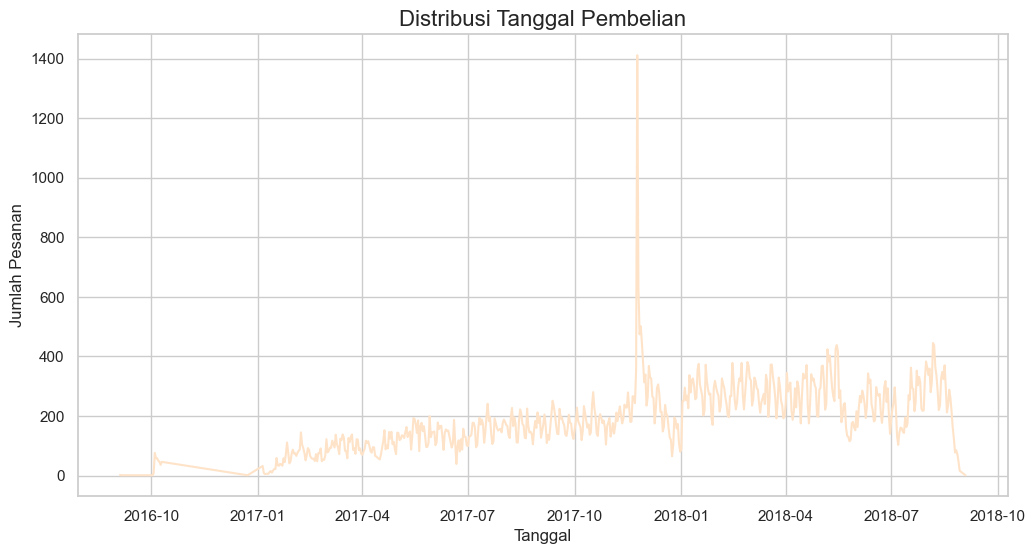

In [77]:
# 5. Distribusi Tanggal Pembelian
plt.figure(figsize=(12, 6))
df['order_purchase_timestamp'].dt.date.value_counts().sort_index().plot()
plt.title('Distribusi Tanggal Pembelian', fontsize=16)
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Pesanan')
plt.grid(True)
plt.show()

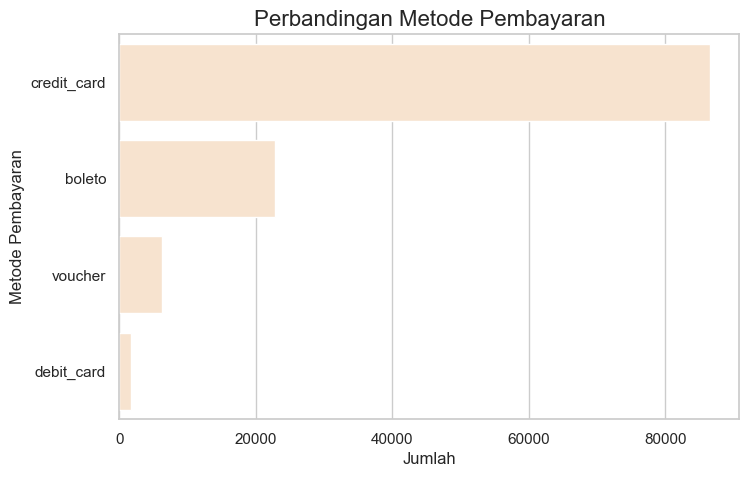

In [78]:
# 6. Perbandingan Metode Pembayaran
plt.figure(figsize=(8, 5))
sns.countplot(data=df, y='payment_type', order=df['payment_type'].value_counts().index)
plt.title('Perbandingan Metode Pembayaran', fontsize=16)
plt.xlabel('Jumlah')
plt.ylabel('Metode Pembayaran')
plt.show()

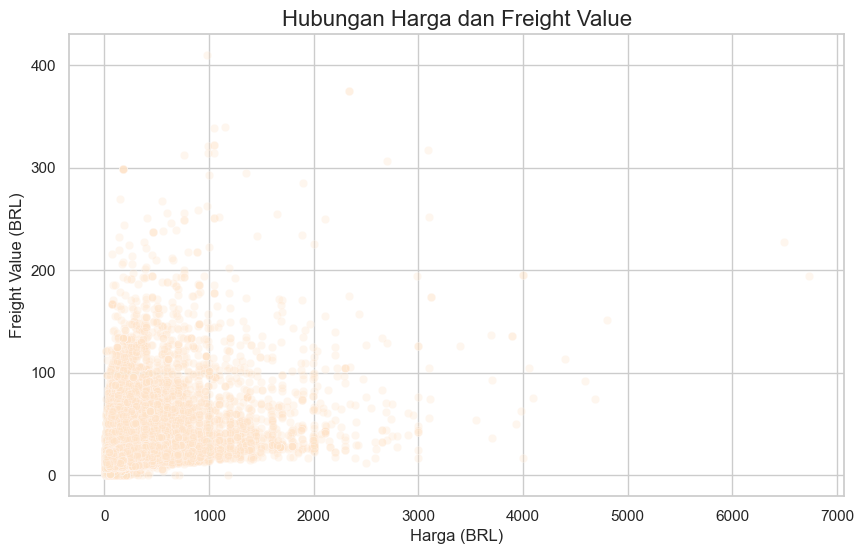

In [79]:
# 7. Hubungan Harga dan Freight Value
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='price', y='freight_value', alpha=0.3)
plt.title('Hubungan Harga dan Freight Value', fontsize=16)
plt.xlabel('Harga (BRL)')
plt.ylabel('Freight Value (BRL)')
plt.show()

# Pertanyaan Bisnis 1: Berapa rata-rata waktu pengiriman dari pesanan dibuat hingga diterima pelanggan, dan bagaimana variasinya di setiap kategori produk dalam 1 tahun terakhir?

asumsinya 1 tahun terakhir dihitung dari timestamp terakhir di dataset, bukan timestamp saat ini

In [69]:
# Analisis waktu pengiriman per kategori produk
def delivery_time_analysis(df):
    """
    Analyze average delivery time by product category in the last year.
    """
    # Filter data for the last year
    last_year_date = df['order_purchase_timestamp'].max() - pd.DateOffset(years=1)
    last_year_df = df[df['order_purchase_timestamp'] >= last_year_date]

    # Group by product category to calculate average delivery time
    delivery_time_by_category = (
        last_year_df.groupby('product_category_name')['delivery_time']
        .mean()
        .sort_values(ascending=False)
        .reset_index()
    )

    # Visualisasi rata-rata waktu pengiriman per kategori
    fig_delivery = px.bar(
        delivery_time_by_category,
        x='delivery_time',
        y='product_category_name',
        color='delivery_time',
        color_continuous_scale='Oranges',
        title='Rata-rata Waktu Pengiriman per Kategori Produk (1 Tahun Terakhir)',
        labels={
            'delivery_time': 'Waktu Pengiriman (Hari)',
            'product_category_name': 'Kategori Produk'
        },
        orientation='h'
    )
    fig_delivery.update_layout(
        xaxis_title="Average Delivery Time (Days)",
        yaxis_title="Product Category",
        font=dict(size=12),
        showlegend=False
    )
    fig_delivery.show()

# Panggil fungsi untuk visualisasi
delivery_time_analysis(df)


Kesimpulan:

Kategori produk besar dan berat seperti furnitur cenderung memiliki waktu pengiriman yang lebih lama, kemungkinan karena tantangan logistik.
Sedangkan produk teknologi seperti konsol dan aksesori lebih cepat, kemungkinan karena ukuran lebih kecil dan lebih mudah dikirim.

# Pertanyaan Bisnis 2: Produk atau kategori apa yang memberikan kontribusi pendapatan terbesar?

In [67]:
# Tambahkan kolom total_value jika belum ada
if 'total_value' not in df.columns:
    df['total_value'] = df['price'] + df['freight_value']

# Analisis kontribusi pendapatan dan performa produk
def revenue_and_performance_analysis(df):
    """
    Analyze revenue contribution, delivery time, and review scores by product category.
    """
    # Group by product category to calculate revenue, delivery time, and review score
    category_performance = (
        df.groupby('product_category_name')
        .agg({
            'total_value': 'sum',  # Total revenue
            'delivery_time': 'mean',  # Average delivery time
            'review_score': 'mean'  # Average review score
        })
        .sort_values('total_value', ascending=False)
        .reset_index()
    )
    
    # Visualisasi kontribusi pendapatan
    fig_revenue = px.bar(
        category_performance,
        x='total_value',
        y='product_category_name',
        color='total_value',
        color_continuous_scale='Oranges',
        title='Kontribusi Pendapatan per Kategori Produk',
        labels={'total_value': 'Total Pendapatan (BRL)', 'product_category_name': 'Kategori Produk'},
        orientation='h'
    )
    fig_revenue.update_layout(
        xaxis_title="Total Revenue (BRL)",
        yaxis_title="Product Category",
        font=dict(size=12),
        showlegend=False
    )
    fig_revenue.show()

    # Visualisasi waktu pengiriman vs skor ulasan
    fig_performance = px.scatter(
        category_performance,
        x='delivery_time',
        y='review_score',
        size='total_value',
        color='total_value',
        color_continuous_scale='Oranges',
        title='Waktu Pengiriman vs Skor Ulasan per Kategori Produk',
        labels={
            'delivery_time': 'Waktu Pengiriman (Hari)',
            'review_score': 'Skor Ulasan',
            'total_value': 'Pendapatan (BRL)'
        },
        hover_data=['product_category_name']
    )
    fig_performance.update_layout(
        xaxis_title="Delivery Time (Days)",
        yaxis_title="Review Score",
        font=dict(size=12),
        showlegend=True
    )
    fig_performance.show()

# Panggil fungsi untuk visualisasi
revenue_and_performance_analysis(df)


# Analisis Lanjutan

## RFM Analysis

In [49]:
import datetime as dt

In [50]:
# Menentukan tanggal referensi untuk menghitung Recency
reference_date = df['order_purchase_timestamp'].max()

In [51]:
# Menghitung Recency, Frequency, dan Monetary
rfm = df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (reference_date - x.max()).days,
    'order_id': 'count',
    'payment_value': 'sum'
}).reset_index()
rfm.columns = ['customer_unique_id', 'recency', 'frequency', 'monetary']

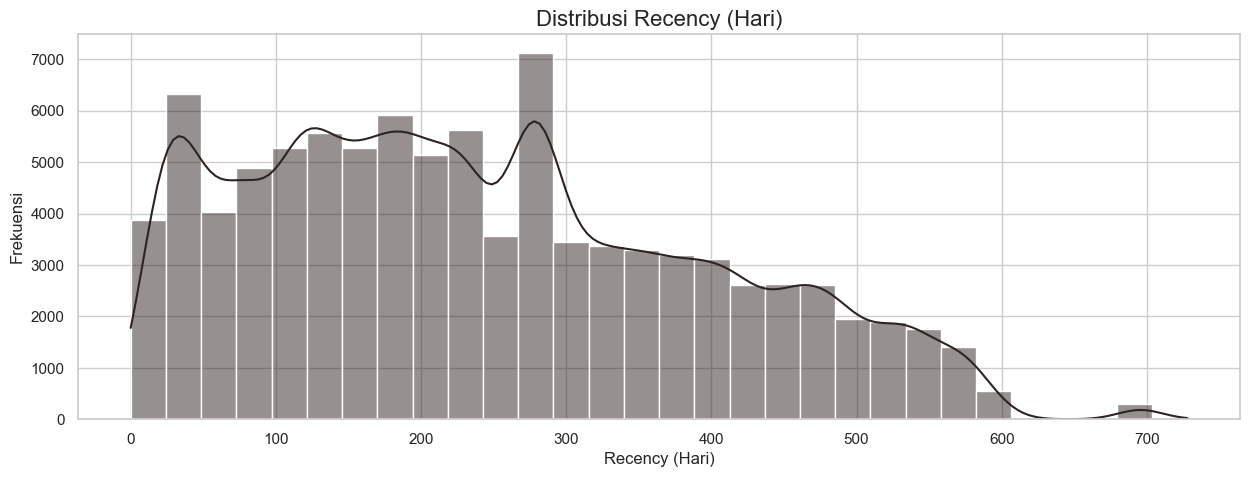

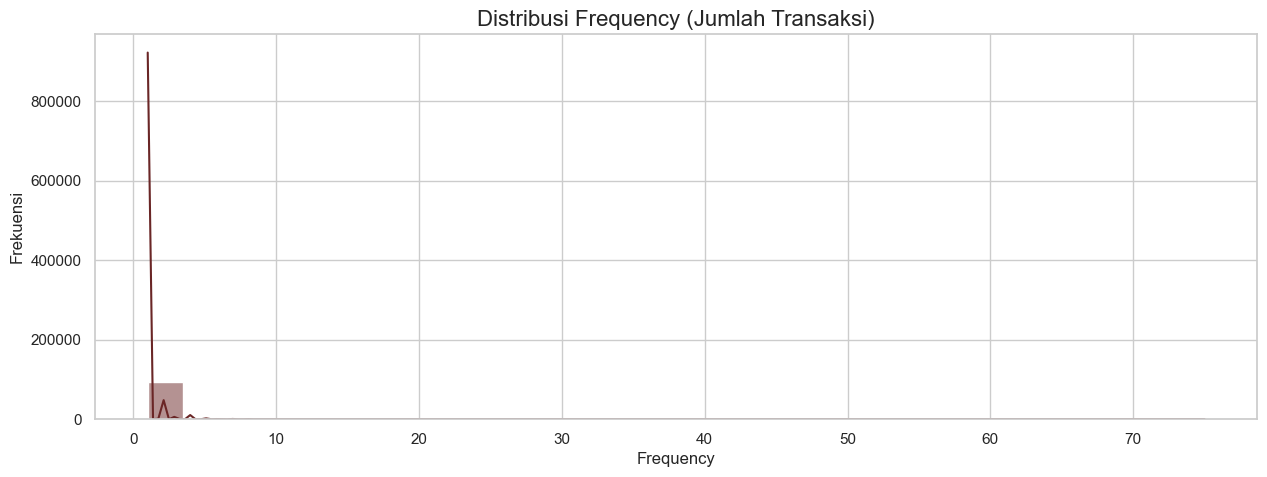

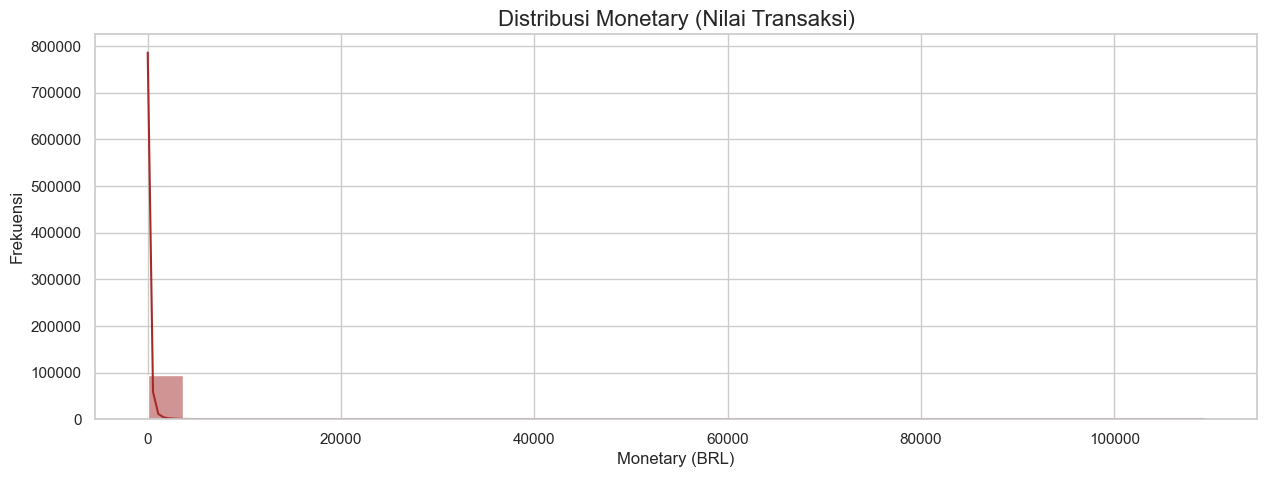

In [82]:
plt.figure(figsize=(15, 5))
sns.histplot(rfm['recency'], kde=True, bins=30, color=sns.color_palette("dark:brown", 3)[0])
plt.title("Distribusi Recency (Hari)", fontsize=16)
plt.xlabel("Recency (Hari)", fontsize=12)
plt.ylabel("Frekuensi", fontsize=12)
plt.show()

plt.figure(figsize=(15, 5))
sns.histplot(rfm['frequency'], kde=True, bins=30, color=sns.color_palette("dark:brown", 3)[1])
plt.title("Distribusi Frequency (Jumlah Transaksi)", fontsize=16)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Frekuensi", fontsize=12)
plt.show()

plt.figure(figsize=(15, 5))
sns.histplot(rfm['monetary'], kde=True, bins=30, color=sns.color_palette("dark:brown", 3)[2])
plt.title("Distribusi Monetary (Nilai Transaksi)", fontsize=16)
plt.xlabel("Monetary (BRL)", fontsize=12)
plt.ylabel("Frekuensi", fontsize=12)
plt.show()


## Analisis Geospatial (Distribusi lokasi pelanggan berdasarkan negara bagian)

C:\Users\anisa\AppData\Local\Temp\ipykernel_24460\1616507749.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




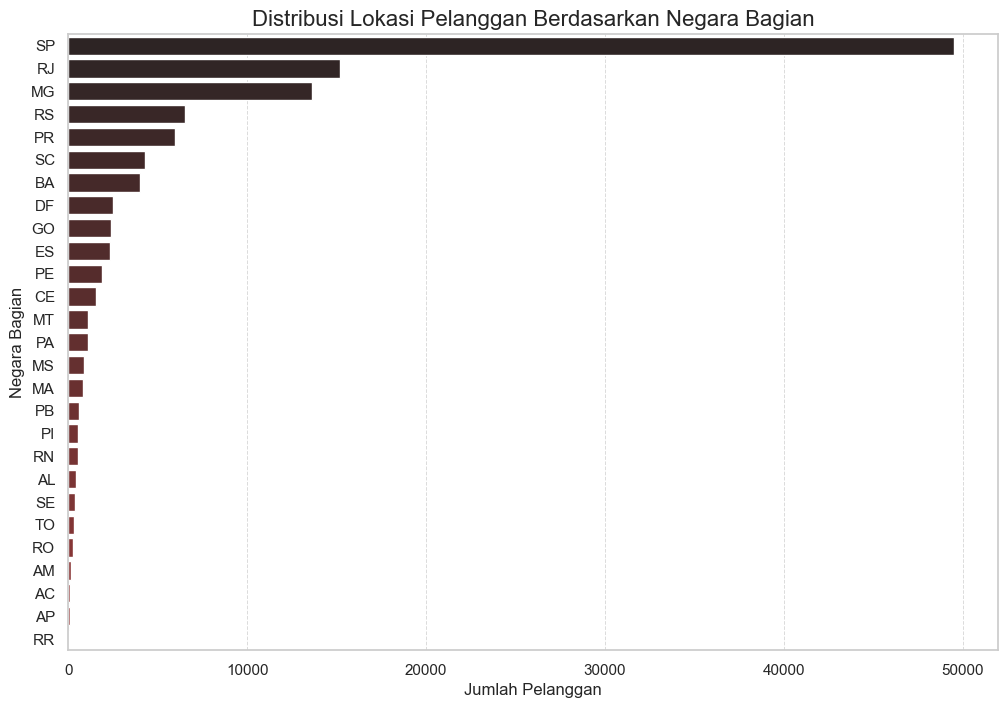

In [83]:
customer_location = df.groupby('customer_state').size().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
colors = sns.color_palette("dark:brown", len(customer_location))
sns.barplot(x=customer_location.values, y=customer_location.index, palette=colors)
plt.title("Distribusi Lokasi Pelanggan Berdasarkan Negara Bagian", fontsize=16)
plt.xlabel("Jumlah Pelanggan", fontsize=12)
plt.ylabel("Negara Bagian", fontsize=12)
plt.grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.7)
plt.show()


# Simpan data clean

In [65]:
# Menyimpan data hasil pembersihan
df.to_csv(f"{data_path}/cleaned_data.csv", index=False)
print("Data hasil pembersihan berhasil disimpan.")


Data hasil pembersihan berhasil disimpan.
